In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/cs109/a-2017/master/Labs/Lab2_Worked_EDA/data/goodreads.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [4]:
data.columns = [['rating', 'review_count', 'isbn', 'book_type','author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name']]
data.head()

,rating,review_count,isbn,book_type,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


## Data Cleaning
### 1. clean book type column - keep only book - regex - str.split()
### 2. year get rid of .0
### 3. name column get rid of ()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
rating          5998 non-null float64
review_count    6000 non-null object
isbn            5525 non-null object
book_type       6000 non-null object
author_url      6000 non-null object
year            5993 non-null float64
genre_urls      5938 non-null object
dir             6000 non-null object
rating_count    6000 non-null object
name            6000 non-null object
dtypes: float64(2), object(8)
memory usage: 468.8+ KB


In [6]:
data.isnull().sum()

rating            2
review_count      0
isbn            475
book_type         0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [7]:
data[data['year'].isnull()]
data[data['rating'].isnull()]

,rating,review_count,isbn,book_type,author_url,year,genre_urls,dir,rating_count,name
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None


I have never heard of most of these books but I could probably look up when they came out in impute the year.
Some of the other values are missing as well so it might be best to just drop these missing values.

In [8]:
def string_split(string):
    temp = string.split(":")
    return temp

In [9]:
data.dtypes

rating          float64
review_count     object
isbn             object
book_type        object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [10]:
data['book_type'].head()
data['book_type'][0].split(":")[1]
data['book_type'].apply(string_split)[1][1]

'book'

In [11]:
data["book_type"] = data['book_type'].apply(string_split)[1][1]

In [12]:
# drop all NA values
data = data.dropna()
data.shape

(5496, 10)

In [13]:
# Year should be integer
data['year'] = data.year.astype(int)

In [14]:
#data['name'][0].split("(")[0]
data['name'] = data['name'].apply(lambda x: x.split("(")[0])
data['name'].head()

0                             The Hunger Games 
1    Harry Potter and the Order of the Phoenix 
2                                     Twilight 
3                         To Kill a Mockingbird
4                           Pride and Prejudice
Name: name, dtype: object

## Questions to ask about data

1. What is the highest rated book
2. what is the lowest rated
3. what is the most reviewed book
4. highest rated book by year
5. Lowest rated book by year

### If we want to analyse the genre and the author we will need to parse these from the author_url and the genre_url

In [15]:
# need to do this for all rows in column
import re
print(data.author_url[0])
temp = re.findall('[A-Z][^A-Z]*', data.author_url[0])
temp1 = "".join(temp)
temp1

https://www.goodreads.com/author/show/153394.Suzanne_Collins


'Suzanne_Collins'

In [16]:
temp2 = data["author_url"].apply(lambda x: re.findall("[A-Z][^A-Z]*", x))
data['Author'] = temp2.apply(lambda x: "".join(x))

In [17]:
data.head()

,rating,review_count,isbn,book_type,author_url,year,genre_urls,dir,rating_count,name,Author
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,The Hunger Games,Suzanne_Collins
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix,J_K_Rowling
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,Twilight,Stephenie_Meyer
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,Harper_Lee
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,Jane_Austen


In [18]:
test_genres = data.genre_urls[0]
genres = test_genres.strip().split("|")
for i in genres:
    print(i.split("/")[-1])
    "|".join(genres)

young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [19]:
def split_genres(x):
    genres = x.strip().split("/")
    genres = [i.split("/")[-1] for i in genres]
    return "|".join(genres)

In [20]:
# Need to map the function
data['genres'] = data['genre_urls'].map(split_genres)
data['genres'].head()

0    |genres|young-adult||genres|science-fiction||g...
1    |genres|fantasy||genres|young-adult||genres|fi...
2    |genres|young-adult||genres|fantasy||genres|ro...
3    |genres|classics||genres|fiction||genres|histo...
4    |genres|classics||genres|fiction||genres|roman...
Name: genres, dtype: object

# Part 4 EDA

# Need to plot histograms in linear and log scale
1. Rating
2. Review Count
3. Rating Count

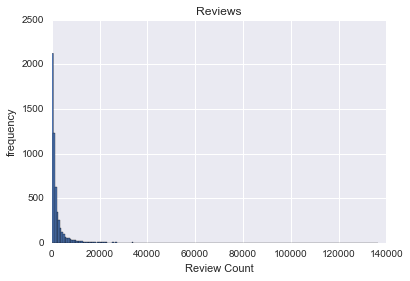

In [21]:
data['review_count'] = data['review_count'].astype(int)
data["review_count"].hist(bins = 200)
plt.xlabel('Review Count')
plt.ylabel("frequency")
plt.title("Reviews")

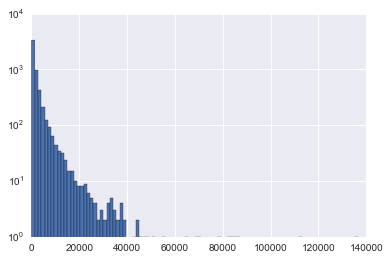

In [22]:
plt.hist(data["review_count"], log = True, bins = 100);

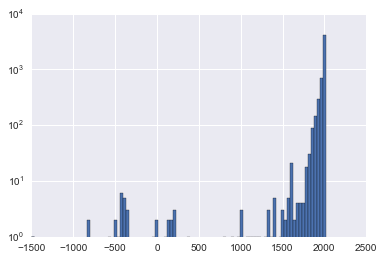

In [23]:
plt.hist(data['year'], log  = True, bins = 100);
# there seems to be books in negative years
# could be B.C., lets check

In [24]:
data[data['year'] < 0].name
# They are all ancient books

47                               The Odyssey
246                    The Iliad/The Odyssey
455                             The Republic
596                               The Aeneid
629                              Oedipus Rex
674                           The Art of War
746                        The Bhagavad Gita
777                                 Antigone
1233                       The Oedipus Cycle
1397                          Aesop's Fables
1398                   The Epic of Gilgamesh
1428                                   Medea
1815                            The Oresteia
1882         The Trial and Death of Socrates
2078    The History of the Peloponnesian War
2527                           The Histories
3133                          Complete Works
3274                  The Nicomachean Ethics
3757                              Lysistrata
4402                           The Symposium
4475                                 Apology
5367                          Five Dialogues
Name: name

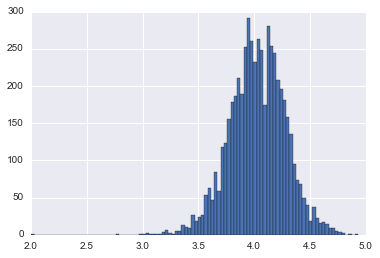

In [25]:
plt.hist(data['rating'], bins = 100);

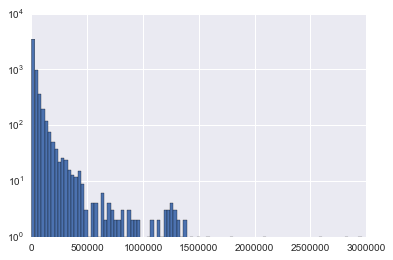

In [26]:
data["rating_count"] = data['rating_count'].astype(int)
plt.hist(data['rating_count'], log = True, bins = 100);

# Part 5: Determining the Best Books

We can find the best books by selecting the books with the highest rating
We could group books by year and select highest rating
We could also grouped books by most reviews and then getting the highest rated

In [27]:
data.columns
data = data.replace([np.inf, -np.inf], np.nan)

In [28]:
# What is the most review book
#data.loc[:, ["review_count", "name"]]
data.loc[:,['name','rating']].sort_values('rating',ascending = False)

,name,rating
3712,Blade Heart,4.93
911,Honor and Polygamy,4.85
249,The Complete Calvin and Hobbes,4.80
2630,If I Should Die Before My Dog --,4.80
5657,Myrtle Mae and the Mirror in the Attic,4.80
5874,Le Monogramme,4.78
5449,Waffles and Pancakes,4.77
1853,ESV Study Bible,4.76
1595,Words of Radiance,4.76
4084,"The Absolute Sandman, Vol. 4",4.75


# Lets look at the top 10 books by rating

- it looks like Blade Heart is the highest rated book
- however, it only has 7 reviews which means there are probably a few hardcore fans giving reviews
- I have actually not heard of most of these books
- all books but one are from the 2000's 2010's.

- we will probably need to incorporate review_count to identify the most popular book.

In [29]:
data.loc[:,['rating','name', 'Author', 'review_count', 'year']].sort_values('rating', ascending = False).head(10)

,rating,name,Author,review_count,year
3712,4.93,Blade Heart,Chris_Lange,7,2013
911,4.85,Honor and Polygamy,Omar_Farhad,26,2014
249,4.80,The Complete Calvin and Hobbes,Bill_Watterson,644,2005
2630,4.80,If I Should Die Before My Dog --,Joe_Connolly,46,2012
5657,4.80,Myrtle Mae and the Mirror in the Attic,Joe_Egly,8,2012
5874,4.78,Le Monogramme,Odysseus_Elytis,18,1972
5449,4.77,Waffles and Pancakes,Cindy_Springsteen,86,2012
1853,4.76,ESV Study Bible,Anonymous,223,2007
1595,4.76,Words of Radiance,Brandon_Sanderson,3361,2014
4084,4.75,"The Absolute Sandman, Vol. 4",Neil_Gaiman,72,2008


In [30]:
# Lets look at highest rated book by year.
# we first groupby year and loop through those
# groups and print and select the rows with the highest rating
# and print out the year, name and rating
for year, subset in data.groupby("year"):
    highest_rated = subset[subset.rating == subset.rating.max()]
    # if more than one book has highest rating
    if highest_rated.shape[0] > 1:
        print(year, highest_rated.name.values, highest_rated.rating.values)
    else:
        print(year, highest_rated.name.values[0], highest_rated.rating.values[0])

-1500 The Epic of Gilgamesh 3.6
-800 The Iliad/The Odyssey 4.01
-560 Aesop's Fables 4.03
-512 The Art of War 3.92
-500 The Bhagavad Gita 4.06
-458 The Oresteia 3.96
-442 Antigone 3.52
-440 The Histories 3.94
-431 Medea 3.8
-429 Oedipus Rex 3.64
-411 The History of the Peloponnesian War 3.84
-400 Complete Works 4.3
-390 Apology 4.11
-380 The Republic 3.85
-370 The Symposium 3.99
-360 Five Dialogues 4.07
-350 The Nicomachean Ethics 3.88
-29 The Aeneid 3.77
4 The Seven Spiritual Laws of Success 4.04
8 Metamorphoses 4.01
100 The New Oxford Annotated Bible, New Revised Standard Version 4.3
121 The Twelve Caesars 4.02
130 Holy Bible 4.45
158 The Golden Ass 3.88
174 Meditations 4.16
200 The Garden of Eden 3.75
201 Fe Fi FOE Comes 4.37
213 NaÃ¯ve. Super 3.9
397 Confessions 3.82
800 Beowulf 3.38
900 The Arabian Nights 4.04
968 La BÃªte humaine  4.02
1002 The Pillow Book 4.04
1008 The Tale of Genji 3.68
1010 Shahnameh 4.52
1100 Rubaiyat of Omar Khayyam 4.22
1106 The TÃ¡in 3.98
1140 Poema de MÃ­o

In [31]:
for year, subset in data.groupby("year"):
    review = subset[subset.review_count == subset.review_count.max()]
    if review.shape[0] > 1:
        print(year, review.name.values, review.review_count.values, review.rating.values)
    else:
        print(year, review.name.values[0], review.review_count.values[0], review.rating.values[0])

-1500 The Epic of Gilgamesh 1644 3.6
-800 The Odyssey 5785 3.68
-560 Aesop's Fables 890 4.03
-512 The Art of War 3559 3.92
-500 The Bhagavad Gita 1087 4.06
-458 The Oresteia 493 3.96
-442 Antigone 1038 3.52
-440 The Histories 506 3.94
-431 Medea 539 3.8
-429 Oedipus Rex 1231 3.64
-411 The History of the Peloponnesian War 399 3.84
-400 The Oedipus Cycle 704 3.94
-390 Apology 281 4.11
-380 The Republic 1499 3.85
-370 The Symposium 516 3.99
-360 Five Dialogues 133 4.07
-350 The Nicomachean Ethics 411 3.88
-29 The Aeneid 1240 3.77
4 The Seven Spiritual Laws of Success 609 4.04
8 Metamorphoses 754 4.01
100 The New Oxford Annotated Bible, New Revised Standard Version 187 4.3
121 The Twelve Caesars 329 4.02
130 Holy Bible 285 4.45
158 The Golden Ass 343 3.88
174 Meditations 1047 4.16
200 The Garden of Eden 646 3.75
201 Fe Fi FOE Comes 8 4.37
213 NaÃ¯ve. Super 297 3.9
397 Confessions 1002 3.82
800 Beowulf 3546 3.38
900 The Arabian Nights 1176 4.04
968 La BÃªte humaine  125 4.02
1002 The Pillow

- If we first extract books based on how many reviews they had by year
- We get a different answer than the previous method.
- These books tend to have a reasonably high rating though anyway

In [32]:
#data[(data['review_count'] > data.review_count.mean()) & (data["rating"] > data.rating.mean())]
data[data['rating'] > data.rating.mean()][['name', 'year']].sort_values('year')


,name,year
1397,Aesop's Fables,-560
746,The Bhagavad Gita,-500
3133,Complete Works,-400
4475,Apology,-390
5367,Five Dialogues,-360
4717,The Seven Spiritual Laws of Success,4
2329,"The New Oxford Annotated Bible, New Revised St...",100
1860,Holy Bible,130
1169,Meditations,174
5404,Fe Fi FOE Comes,201


# Part 6: Trends in Popularity of Genres
This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.

Which genre is currently the most popular?
Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?

- To see what the most popular genres are we can get the counts of the genres.
- we first need to extract unique genres from the genre column which are separated by |
- using a set data type would make this easy

In [33]:
genres = set()
for genre_string in data.genres:
    genres.update(genre_string.split('|'))
genres = sorted(genres)
genres



['',
 '14th-century',
 '15th-century',
 '16th-century',
 '17th-century',
 '18th-century',
 '19th-century',
 '20th-century',
 'abuse',
 'academia',
 'academic',
 'action',
 'activism',
 'adolescence',
 'adoption',
 'adult',
 'adult-fiction',
 'adventure',
 'africa',
 'african-american',
 'african-american-literature',
 'african-literature',
 'aliens',
 'alternate-history',
 'american',
 'american-civil-war',
 'american-fiction',
 'american-history',
 'american-novels',
 'americana',
 'ancient',
 'angels',
 'animal-fiction',
 'animals',
 'anime',
 'anthologies',
 'anthropology',
 'anthropomorphic',
 'apocalyptic',
 'architecture',
 'art',
 'art-history',
 'arthurian',
 'asia',
 'asian-literature',
 'astronomy',
 'atheism',
 'australia',
 'autobiography',
 'bande-dessin%C3%A9e',
 'banned-books',
 'baseball',
 'basketball',
 'batman',
 'bdsm',
 'beauty-and-the-beast',
 'belgian',
 'belgium',
 'biography',
 'biography-memoir',
 'biology',
 'birds',
 'bizarro-fiction',
 'boarding-school',
 '

In [34]:
data.shape


(5496, 12)

In [35]:
data = data[['rating', 'review_count', 'isbn', 'book_type','author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name', "Author", "genres"]]

In [36]:
# loop through each entry in genres
# Then list comprehension loops through data.genres column and splits by | on each one
# it then checks if they are in the genres set and produces true of false
for genre in genres:
    data["genre:"+genre] = [genre in g.split('|') for g in data.genres]
         
data.head()

,rating,review_count,isbn,book_type,author_url,year,genre_urls,dir,rating_count,name,...,genre:x-men,genre:young-adult,genre:young-adult-contemporary,genre:young-adult-fantasy,genre:young-adult-historical-fiction,genre:young-adult-paranormal,genre:young-adult-romance,genre:young-readers,genre:zen,genre:zombies
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,The Hunger Games,...,False,True,False,False,False,False,False,False,False,False
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix,...,False,True,False,False,False,False,False,False,False,False
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,Twilight,...,False,True,False,False,False,False,False,False,False,False
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,...,False,True,False,False,False,False,False,False,False,False
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,...,False,False,False,False,False,False,False,False,False,False


In [113]:
glist = ["genre:" +g for g in genres]
glist

ans = data[glist].sum()
ans
ans.sort_values(ascending = False)
#Ignoring the first two we have fiction as the most prevalent genre

genre:                                  5496
genre:genres                            5496
genre:fiction                           4194
genre:fantasy                           2581
genre:young-adult                       1953
genre:romance                           1941
genre:literature                        1561
genre:classics                          1554
genre:novels                            1422
genre:historical-fiction                1151
genre:contemporary                      1147
genre:adventure                         1136
genre:paranormal                        1093
genre:adult                             1092
genre:mystery                            975
genre:science-fiction                    923
genre:book-club                          912
genre:cultural                           838
genre:european-literature                755
genre:science-fiction-fantasy            719
genre:magic                              711
genre:supernatural                       706
genre:chil

In [38]:
#Plot some of these, skip first two
a= ans.sort_values(ascending = False).iloc[1]
b = ans.sort_values(ascending = False).iloc[2] 
percent_fantasy = (b/a)*100
percent_fantasy
print("Percent of book that are fantasy: %0.2f" % percent_fantasy)

Percent of book that are fantasy: 76.31


In [111]:
# Check the top 10 genres as % of total
#total = ans.sort_values(ascending = False).iloc[1] 
#top_10 = ans.sort_values(ascending = False)[1:11]

ans = [(i/total)*100 for i in top_10]

for j in ans:
    print("---")
    print("Percentage of Total books: {}".format(round(j,2)))

---
Percentage of Total books: 100.0
---
Percentage of Total books: 76.31
---
Percentage of Total books: 46.96
---
Percentage of Total books: 35.53
---
Percentage of Total books: 35.32
---
Percentage of Total books: 28.4
---
Percentage of Total books: 28.28
---
Percentage of Total books: 25.87
---
Percentage of Total books: 20.94
---
Percentage of Total books: 20.87


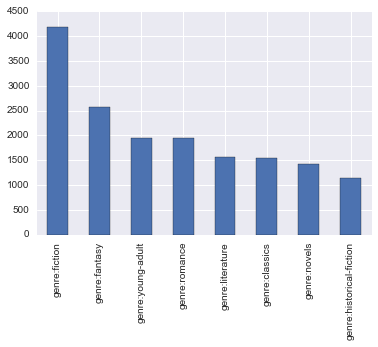

In [114]:
ans.sort_values(ascending = False).iloc[2:10].plot(kind = "bar")

In [115]:
popular = ans.index[ans.values > 800]

In [41]:
data.head()

,rating,review_count,isbn,book_type,author_url,year,genre_urls,dir,rating_count,name,...,genre:x-men,genre:young-adult,genre:young-adult-contemporary,genre:young-adult-fantasy,genre:young-adult-historical-fiction,genre:young-adult-paranormal,genre:young-adult-romance,genre:young-readers,genre:zen,genre:zombies
0,4.40,136455,0439023483,book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,The Hunger Games,...,False,True,False,False,False,False,False,False,False,False
1,4.41,16648,0439358078,book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix,...,False,True,False,False,False,False,False,False,False,False
2,3.56,85746,0316015849,book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,Twilight,...,False,True,False,False,False,False,False,False,False,False
3,4.23,47906,0061120081,book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird,...,False,True,False,False,False,False,False,False,False,False
4,4.23,34772,0679783261,book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice,...,False,False,False,False,False,False,False,False,False,False


In [97]:
#checking what the oldest book is
data[(data["year"] == -800) & (data["genre:fiction"]==True)]

,rating,review_count,isbn,book_type,author_url,year,genre_urls,dir,rating_count,name,...,genre:x-men,genre:young-adult,genre:young-adult-contemporary,genre:young-adult-fantasy,genre:young-adult-historical-fiction,genre:young-adult-paranormal,genre:young-adult-romance,genre:young-readers,genre:zen,genre:zombies
47,3.68,5785,0143039954,book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey,...,False,False,False,False,False,False,False,False,False,False


# Let's do some plots of genres over time


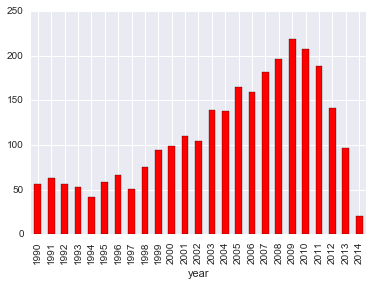

In [116]:
yeardf = data.groupby('year')
fiction = yeardf["genre:fiction"].sum()

#Only return books post 1989
fic1 = fiction[fiction.index > 1989]
fic1.plot(kind = "bar", color = 'r')

- Looks like fiction books popularity peaked in 2009 and subsequently fallen since

## Lets make a function that will plot this for us

In [117]:
def plot_func(data, x, year):
    grouped_data = data.groupby('year')
    genre = grouped_data[x].sum()
    genre1 = genre[genre.index > year]
    plt = genre1.plot(kind = 'bar',color = 'r', title = x)

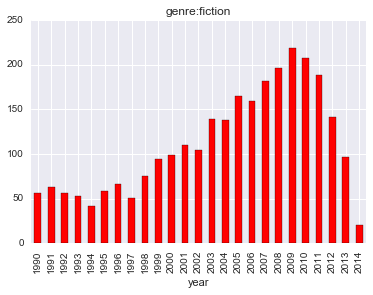

In [118]:
plot_func(data, 'genre:fiction', 1989)

- I will write a loop to plot the popular genres 

In [77]:
popular = popular[1:]
popular

Index(['genre:adventure', 'genre:book-club', 'genre:classics',
       'genre:contemporary', 'genre:cultural', 'genre:fantasy',
       'genre:fiction', 'genre:genres', 'genre:historical-fiction',
       'genre:literature', 'genre:mystery', 'genre:novels', 'genre:paranormal',
       'genre:romance', 'genre:science-fiction', 'genre:young-adult'],
      dtype='object')

## Using subplots to plot book genres popularity across time

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


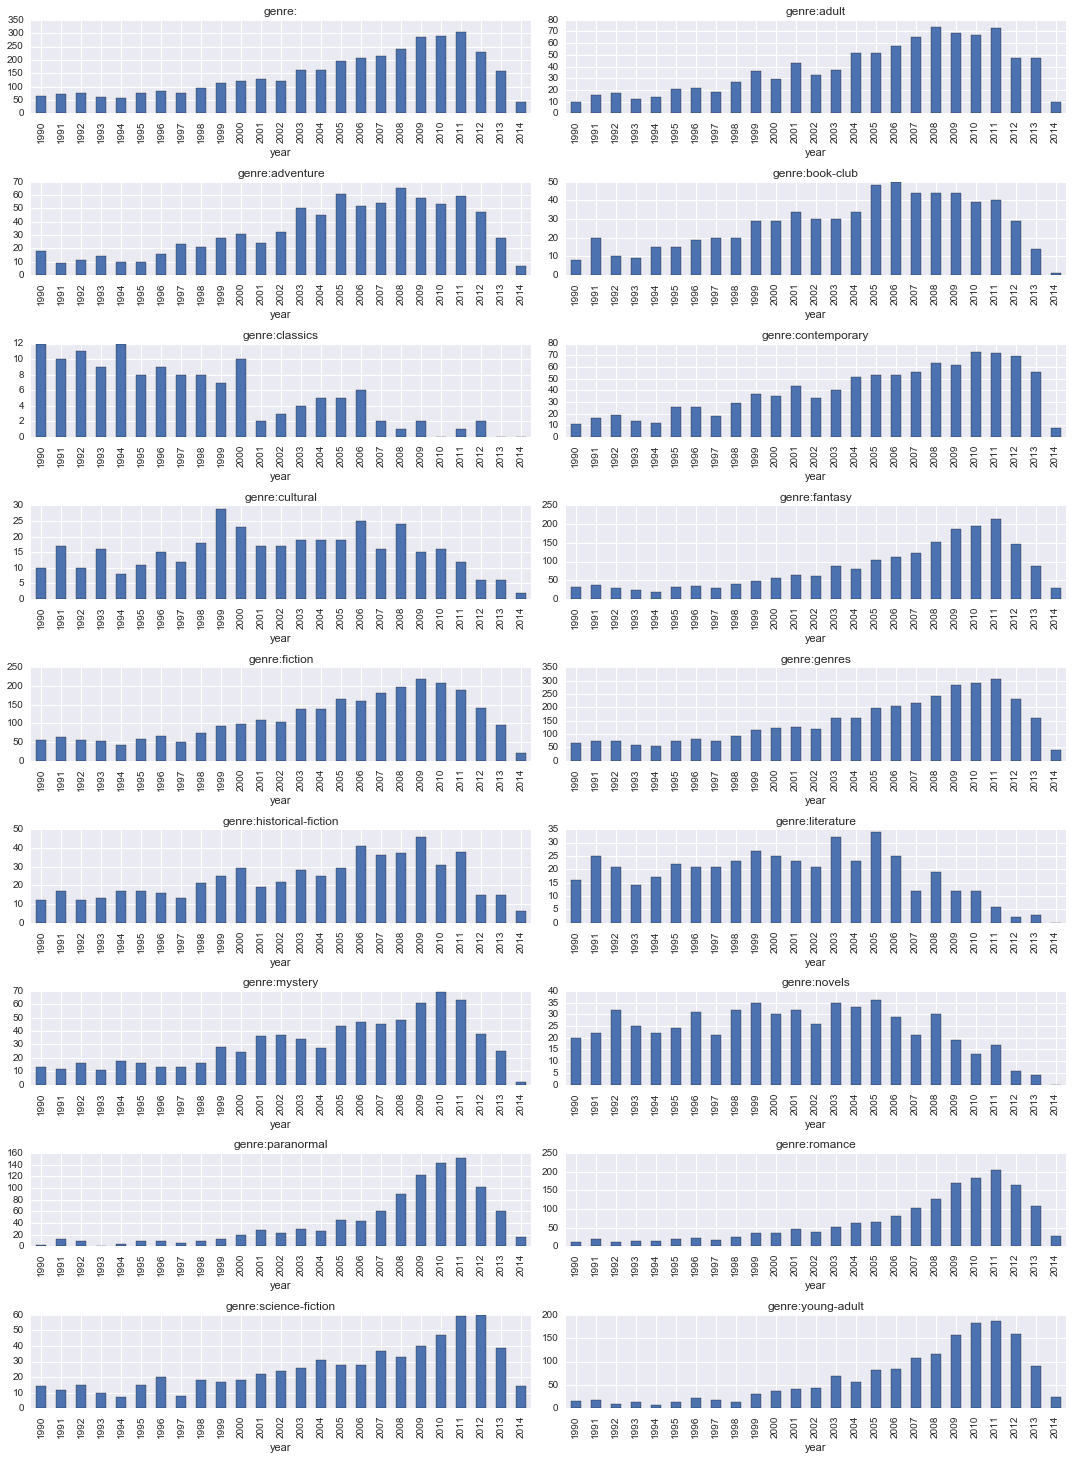

In [120]:
fig = plt.subplots(figsize=(15, 40), tight_layout = True)

temp_list = []

# plot numbering starts at 1
plot_number = 1
for i, genre in enumerate(popular):
    ax = plt.subplot(popular.shape[0], 2, plot_number)
    temp = yeardf[genre].sum()
    temp_list.append(temp[temp.index > 1989])

    temp_list[i].plot(kind = 'bar', ax = ax ,title = genre)
    
    plot_number += 1    



## General Trends in book Popularity

- Most books seem to get quite popular in the 2000's before peaking at around 2010-2011
- This seems to be true for alot of the genres.
- One of the genres that stands out is classics.
- These books have been steadily declining in popularity from 1990 onwards.
- The novels genre seems to have maintained relatively popular throughout the years
  before declining in the number of reviews more recently.